<a href="https://colab.research.google.com/github/junaidkhan37/AmazonCouponReasearch/blob/main/CouponStudyConclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Couponstudy

## Import libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

## Load data

In [14]:
data = pd.read_csv('data/coupons.csv')
warnings.filterwarnings("ignore")

## Analyzing the data

In [15]:
pd.set_option('display.max_column', None)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In this code we've gotten more detailed data with more columns of customer's information

## Investigate the dataset for missing or problematic data.

In [16]:
data.count()

,0
destination,12684
passanger,12684
weather,12684
temperature,12684
time,12684
coupon,12684
expiration,12684
gender,12684
age,12684
maritalStatus,12684


In [17]:
# Calculate percentage of missing data for each column
missing_percentage = (data.isna().sum() / len(data)) * 100
missing_count=data.isna().sum()

# Display the percentages sorted from highest to lowest
print("Percentage of missing values per column:\n")
print(missing_percentage.sort_values(ascending=False))
# Display the percentages sorted from highest to lowest
print("Count of missing values per column:\n")
print(missing_count.sort_values(ascending=False))

Percentage of missing values per column:

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
weather                  0.000000
temperature              0.000000
destination              0.000000
passanger                0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
time                     0.000000
income                   0.000000
occupation               0.000000
has_children             0.000000
education                0.000000
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64
Count of missing values per column:

car                   

Explanation

The dataset contains information about drivers, their demographics, and driving conditions related to coupon acceptance behavior. After inspecting missing values, we found that the car column had too many missing entries and was dropped. Other columns like Bar, CoffeeHouse, and CarryAway, RestaurantLessThan20 and Restaurant20To50 had relatively few missing values, which were filled using the most frequent value (mode) to keep the data consistent for analysis.

Car (99.15%) → Almost all values are missing, meaning this column has very little usable data. It’s best to drop this column.
CoffeeHouse (1.71%), Restaurant20To50 (1.49%), CarryAway (1.19%), RestaurantLessThan20 (1.02%), and Bar (0.84%) → Only a small fraction of data is missing here, less than 2%. This is minor and can be handled easily, for example, by filling missing values with a default like “never.”

Car (12,576 missing values) → This column has almost all its entries missing (out of 12,684 total), making it unusable. It should be dropped from the dataset.
CoffeeHouse (217 missing), Restaurant20To50 (189 missing), CarryAway (151 missing), RestaurantLessThan20 (130 missing), Bar (107 missing) → These columns have very few missing values compared to the total dataset. The missing data here is minor and can be filled with a reasonable default, such as "never", to maintain consistency

## Deciding what to do about your missing data

In [18]:
# 1. Check how many missing values each column has
missing_vals = data.isnull().sum()
print("Missing values per column:\n")
print(missing_vals)

# 2. Decide what to do:
# - 'car' has many missing values (almost all) → drop
# - Frequency columns (Bar, CoffeeHouse, etc.) have few missing values → replace with 'never'
# - Other columns have no missing values → keep as is

# Drop 'car' column due to excessive missing data
data.drop(columns=['car'], inplace=True)

# Fill missing values in frequency-based columns with 'never'
freq_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[freq_cols] = data[freq_cols].fillna('never')

# 3. Verify that there are no missing values left
print("\nMissing values after cleaning:\n")
print(data.isnull().sum())

# 4. (Optional) Confirm cleaned data shape
print(f"\n✅ Cleaned DataFrame shape: {data.shape}")

Missing values per column:

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Missing values after cleaning:

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon          

Explanation

In this step, we handled missing data to prepare the dataset for analysis. First, we checked how many missing values each column contained. The car column had too many missing entries, so it was dropped from the dataset. The frequency-based columns (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50) had only a few missing values, so we replaced them with "never" to stay consistent. After cleaning, we verified that no missing values remained and confirmed the new shape of the cleaned DataFrame.

##Analyzing the proportion of customers accepted coupons

In [19]:
# Calculate the proportion of people who accepted the coupon
acceptance_rate = data['Y'].mean()

print(f"Proportion of observations that accepted the coupon: {acceptance_rate:.2f}")

Proportion of observations that accepted the coupon: 0.57


Explanation

The propotion of total observations that accepted the coupons is 57%

##Now using bar plot to visualize the coupon column

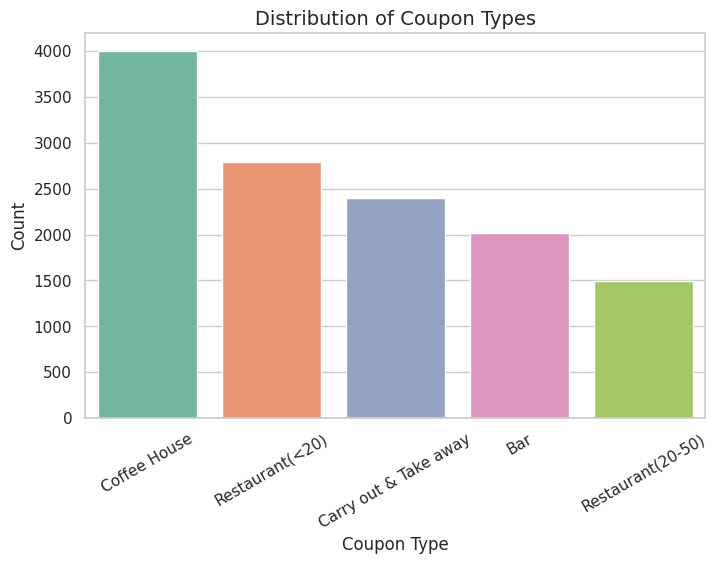

In [20]:


# Set a clean style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8,5))
sns.countplot(x='coupon', data=data, order=data['coupon'].value_counts().index, palette='Set2')

# Add titles and labels
plt.title('Distribution of Coupon Types', fontsize=14)
plt.xlabel('Coupon Type')
plt.ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=30)

# Show the plot
plt.show()

Explanation

The bar shows that the coffee house coupon has been the most distributed coupon type followed by Restaurant<20, Carryout & Take away, Bar, Restaurant(20-50) respectively

##Now using the histogram to visualize the temprature column

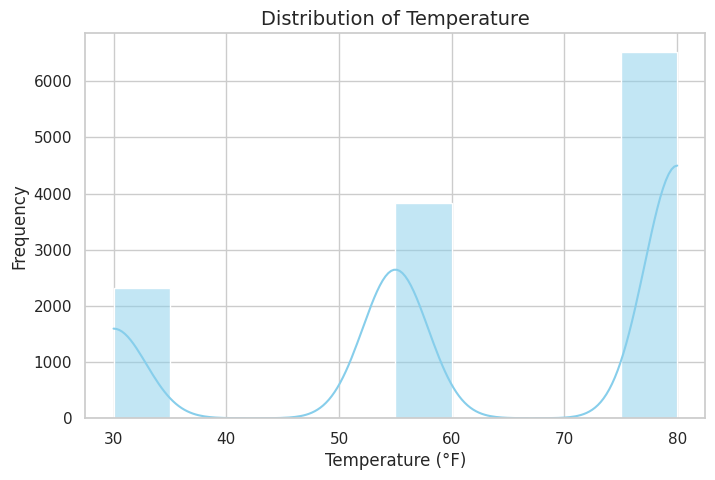

In [21]:


# Set plot style
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(8,5))
sns.histplot(data['temperature'], bins=10, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Temperature', fontsize=14)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Explanation

The histogram shows that the people have acccepted more coupons when the temprature was hot or it was sunny outside

Now analyzing coupon based on multiple different aspects of customers

##Acceptance by passenger type  

Acceptance rate by passenger type (%):
passanger
Alone        52.580424
Friend(s)    67.343845
Kid(s)       50.497018
Partner      59.534884
Name: Y, dtype: float64


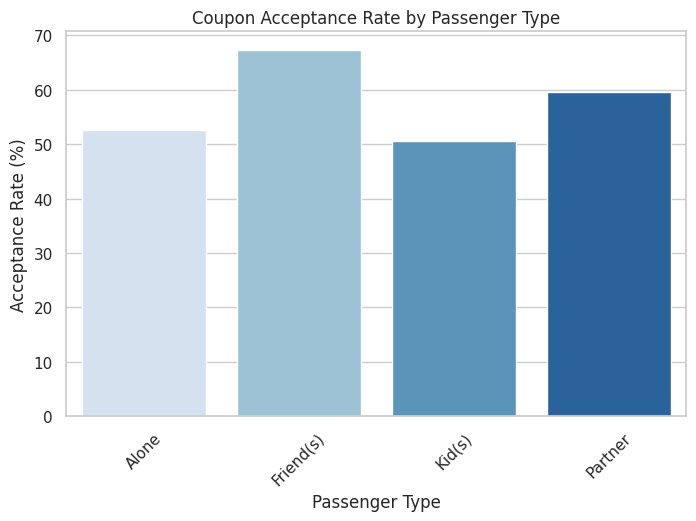

In [23]:
# Calculate acceptance rate by passenger type
acceptance_by_passenger = data.groupby('passanger')['Y'].mean() * 100

# Display the results
print("Acceptance rate by passenger type (%):")
print(acceptance_by_passenger)

# Visualize

plt.figure(figsize=(8, 5))
sns.barplot(x=acceptance_by_passenger.index, y=acceptance_by_passenger.values, palette='Blues')
plt.title('Coupon Acceptance Rate by Passenger Type')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Passenger Type')
plt.xticks(rotation=45)
plt.show()


Explanation of coupon acceptance rate by passenger type

Drivers with friends (67.34%) had the highest acceptance rate, suggesting that social contexts may encourage spontaneous decisions like redeeming coupons.
Drivers with partners (59.53%) also showed a moderately high acceptance rate, possibly reflecting shared decision-making.
Drivers alone (52.58%) were less likely to accept coupons, which might indicate less motivation to make detours when alone.
Drivers with kids (50.50%) had the lowest acceptance rate, likely due to practical constraints such as time or convenience.

##Acceptance rate by weather

Acceptance rate by weather (%):
weather
Rainy    46.280992
Snowy    47.046263
Sunny    59.479591
Name: Y, dtype: float64


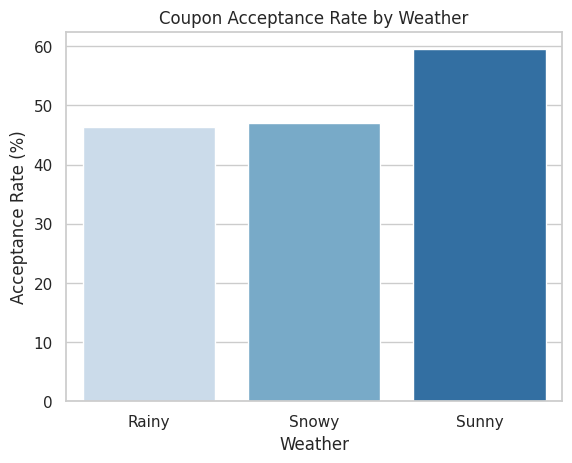

In [24]:
# Calculate acceptance rate by weather
weather_acceptance = data.groupby('weather')['Y'].mean() * 100

# Display the acceptance rate in percentage
print("Acceptance rate by weather (%):")
print(weather_acceptance)

# Optional: visualize with a bar plot

sns.barplot(x=weather_acceptance.index, y=weather_acceptance.values, palette='Blues')
plt.title('Coupon Acceptance Rate by Weather')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Weather')
plt.show()

Explanation

The weather plays a big role in customers accepting coupons. Sunny weather (59.48%) has the highest acceptance rate, suggesting that drivers are more likely to accept coupons when the weather is pleasant, possibly because they are more willing to make additional stops or detours.
Snowy (47.05%) and Rainy (46.28%) conditions show lower acceptance rates, indicating that drivers are less likely to use coupons when the weather is bad—likely due to reduced willingness to go out or drive extra distances

##Acceptance rate by destination

Acceptance rate by destination (%):
destination
Home               50.633302
No Urgent Place    63.377367
Work               50.221239
Name: Y, dtype: float64


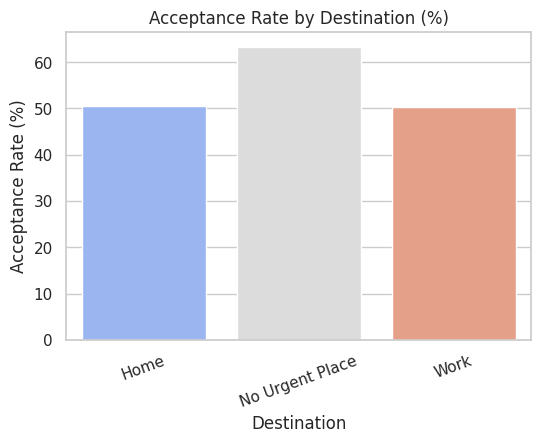

In [25]:
# Calculate acceptance rate (in %) by destination
acceptance_by_destination = data.groupby('destination')['Y'].mean() * 100

# Display the results
print("Acceptance rate by destination (%):")
print(acceptance_by_destination)

# Optional: visualize it

plt.figure(figsize=(6,4))
sns.barplot(x=acceptance_by_destination.index, y=acceptance_by_destination.values, palette='coolwarm')
plt.title("Acceptance Rate by Destination (%)")
plt.ylabel("Acceptance Rate (%)")
plt.xlabel("Destination")
plt.xticks(rotation=20)
plt.show()

Explanation

No Urgent Place (63.38%) — Drivers with no specific destination are the most likely to accept coupons. This makes sense since they have more flexibility to stop somewhere spontaneously.
Home (50.63%) — About half of the drivers heading home accept coupons, suggesting moderate interest, possibly depending on convenience or timing.
Work (50.22%) — Drivers going to work are the least likely to accept coupons, likely because they are on a schedule or have less freedom to make detours

##Acceptance rate by gender

Acceptance rate by gender (%):
gender
Female    54.722777
Male      59.079864
Name: Y, dtype: float64


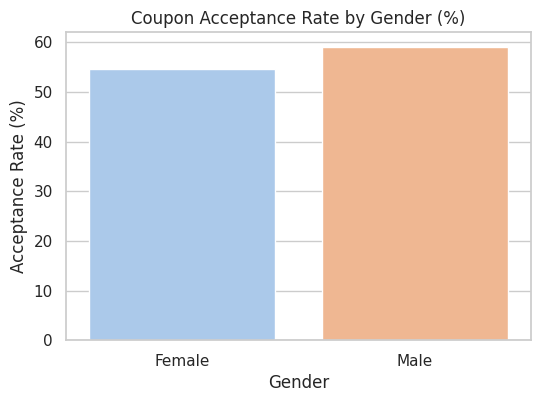

In [26]:
# Calculate acceptance rate by gender
acceptance_by_gender = data.groupby('gender')['Y'].mean() * 100

# Display the results
print("Acceptance rate by gender (%):")
print(acceptance_by_gender)

# Visualize using a bar plot

plt.figure(figsize=(6,4))
sns.barplot(x=acceptance_by_gender.index, y=acceptance_by_gender.values, palette='pastel')
plt.title('Coupon Acceptance Rate by Gender (%)')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Gender')
plt.show()


Explanation

Males (59.08%) have a slightly higher acceptance rate than females (54.72%), suggesting that male drivers in this dataset are somewhat more likely to accept coupons.
The difference is moderate, indicating that gender may have some influence on coupon acceptance, but it is not the only determining factor—other attributes like passenger type, destination, or coupon type may also play a role. Male customers are likely to accept more coupons than female drivers by a slight difference

##Acceptance rate by Coupon type

Acceptance rate by coupon type (%):
coupon
Bar                      41.001487
Carry out & Take away    73.547848
Coffee House             49.924925
Restaurant(20-50)        44.101877
Restaurant(<20)          70.710696
Name: Y, dtype: float64


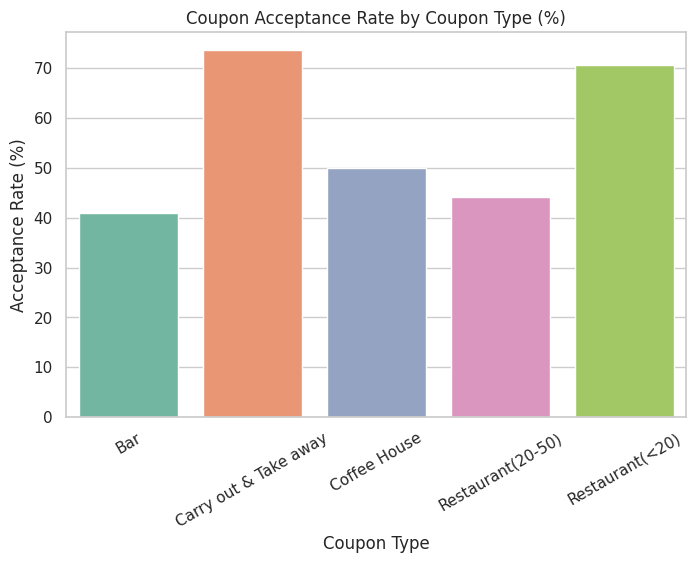

In [27]:
# Calculate acceptance rate by coupon type
acceptance_by_coupon = data.groupby('coupon')['Y'].mean() * 100

# Display the results
print("Acceptance rate by coupon type (%):")
print(acceptance_by_coupon)

# Visualize using a bar plot

plt.figure(figsize=(8,5))
sns.barplot(x=acceptance_by_coupon.index, y=acceptance_by_coupon.values, palette='Set2')
plt.title('Coupon Acceptance Rate by Coupon Type (%)')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Coupon Type')
plt.xticks(rotation=30)
plt.show()


Explanation

Carry out & Take away (73.55%) and Restaurant(<20) (70.71%) have the highest acceptance rates, indicating that drivers are more likely to use coupons for inexpensive or quick meals.
Coffee House (49.92%) and Restaurant(20-50) (44.10%) have moderate acceptance, suggesting some hesitation for mid-range meals or coffee stops.
Bar coupons (41.00%) have the lowest acceptance rate, implying that fewer drivers choose to divert for bars, possibly due to social, safety, or situational constraints.
Carry out and affordable restaurants have the highest rate of acceptance for coupon type

## Acceptance rate by Age group

Acceptance rate by age group (%):
age
21         59.819073
26         59.593591
31         54.634625
36         53.525398
41         57.273559
46         57.580175
50plus     50.894855
below21    63.436929
Name: Y, dtype: float64


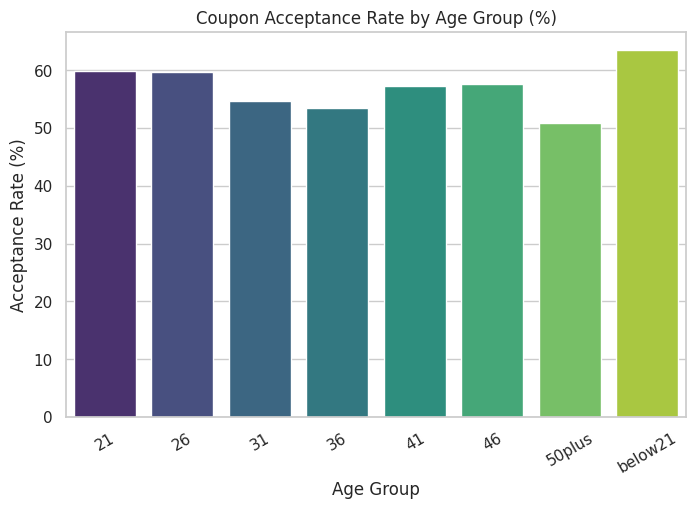

In [28]:
# Calculate acceptance rate by age group
acceptance_by_age = data.groupby('age')['Y'].mean() * 100

# Display the results
print("Acceptance rate by age group (%):")
print(acceptance_by_age)

# Visualize using a bar plot

plt.figure(figsize=(8,5))
sns.barplot(x=acceptance_by_age.index, y=acceptance_by_age.values, palette='viridis')
plt.title('Coupon Acceptance Rate by Age Group (%)')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=30)
plt.show()


Explanation

Below 21 (63.44%) and 21–26 (≈59.8% and 59.6%) have the highest acceptance rates, suggesting younger drivers are more likely to accept coupons.
31–36 (≈53–54%) show moderate acceptance.
50plus (50.89%) has the lowest acceptance rate, indicating older drivers are less likely to divert for coupons.
Some mid-age groups (41–46) show slightly higher acceptance than 31–36, but overall, there is a trend of decreasing acceptance with increasing age.

##Acceptance by marital status

Acceptance rate by marital status (%):
maritalStatus
Divorced             52.906977
Married partner      54.294118
Single               60.585017
Unmarried partner    56.129918
Widowed              47.692308
Name: Y, dtype: float64


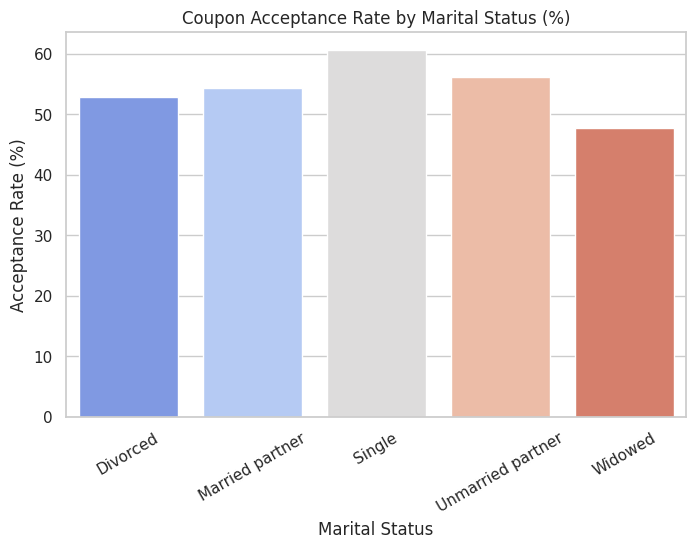

In [29]:
# Calculate acceptance rate by marital status
acceptance_by_marital = data.groupby('maritalStatus')['Y'].mean() * 100

# Display the results
print("Acceptance rate by marital status (%):")
print(acceptance_by_marital)

# Visualize using a bar plot

plt.figure(figsize=(8,5))
sns.barplot(x=acceptance_by_marital.index, y=acceptance_by_marital.values, palette='coolwarm')
plt.title('Coupon Acceptance Rate by Marital Status (%)')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Marital Status')
plt.xticks(rotation=30)
plt.show()


Explanation

Single drivers (60.59%) and unmarried partners (56.13%) have the highest acceptance rates, suggesting that those not in formal or long-term relationships are more likely to take coupons.
Married partners (54.29%) and divorced drivers (52.91%) have moderate acceptance.
Widowed drivers (47.69%) have the lowest acceptance rate, indicating that they are less likely to accept coupons.

CONCLUSION

Keeping in mind the dataset we have for the Amazon customers here is showing that if the Amaznon customer is a Single(60.59%) Male(59.07%) under the Age of 21(59.08%)
and heading to no urgent place(63.37%) on a sunny day(59.47%) riding with friends(67.34%) would have the higghest chances of accepting caryy out and take away(73.54%) coupons most probably right away